In [116]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [117]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
# params = {"token": "$$app_token=2chCzz50gH6DpOapebwdtsXcQ",
#           "limit": "&$limit=10000"
# }
response = requests.get(url,limit).json()

In [118]:
# To check total rows
len(response)

925720

In [119]:
response

[{'dr_no': '190326475',
  'date_rptd': '2020-03-01T00:00:00.000',
  'date_occ': '2020-03-01T00:00:00.000',
  'time_occ': '2130',
  'area': '07',
  'area_name': 'Wilshire',
  'rpt_dist_no': '0784',
  'part_1_2': '1',
  'crm_cd': '510',
  'crm_cd_desc': 'VEHICLE - STOLEN',
  'vict_age': '0',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '101',
  'premis_desc': 'STREET',
  'status': 'AA',
  'status_desc': 'Adult Arrest',
  'crm_cd_1': '510',
  'crm_cd_2': '998',
  'location': '1900 S  LONGWOOD                     AV',
  'lat': '34.0375',
  'lon': '-118.3506'},
 {'dr_no': '200106753',
  'date_rptd': '2020-02-09T00:00:00.000',
  'date_occ': '2020-02-08T00:00:00.000',
  'time_occ': '1800',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0182',
  'part_1_2': '1',
  'crm_cd': '330',
  'crm_cd_desc': 'BURGLARY FROM VEHICLE',
  'mocodes': '1822 1402 0344',
  'vict_age': '47',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '128',
  'premis_desc': 'BUS STOP/LAYOVER

In [120]:
# Create a dataframe
response_df = pd.DataFrame(response)

In [121]:
#Display the new dataframe
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [122]:
#Total rows in new dataframe: 925,720
response_df["dr_no"].count()

925720

In [123]:
#Check the name of the columns
response_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [124]:
# Change latitude and longitute from object to float
response_df["lon"] = response_df["lon"].astype(float)
response_df["lat"] = response_df["lat"].astype(float)

In [125]:
#Confirm lon, lat as float
response_df.dtypes

dr_no              object
date_rptd          object
date_occ           object
time_occ           object
area               object
area_name          object
rpt_dist_no        object
part_1_2           object
crm_cd             object
crm_cd_desc        object
vict_age           object
vict_sex           object
vict_descent       object
premis_cd          object
premis_desc        object
status             object
status_desc        object
crm_cd_1           object
crm_cd_2           object
location           object
lat               float64
lon               float64
mocodes            object
weapon_used_cd     object
weapon_desc        object
cross_street       object
crm_cd_3           object
crm_cd_4           object
dtype: object

In [126]:
#Create a copy of the dataframe to preserve the original
response_df_formatted = response_df.copy()

In [127]:
#Create a clean Dataframe by drop latitud and longitute = 0
response_df_formatted=response_df_formatted.loc[response_df_formatted["lon"] != 0]

In [128]:
# Confirm dataframe as been cleaned
response_df_formatted.loc[response_df_formatted["lat"] == 0]

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4


In [129]:
# To convert date occurence format, from object to date
# source: https://stackoverflow.com/questions/68296206/pandas-period-to-to-timestamp-giving-me-typeerror
response_df_formatted["date_occ"] =pd.to_datetime(response_df_formatted["date_occ"])
response_df_formatted


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [130]:
# To confirm that date occurence format change successfully
response_df_formatted.dtypes

dr_no                     object
date_rptd                 object
date_occ          datetime64[ns]
time_occ                  object
area                      object
area_name                 object
rpt_dist_no               object
part_1_2                  object
crm_cd                    object
crm_cd_desc               object
vict_age                  object
vict_sex                  object
vict_descent              object
premis_cd                 object
premis_desc               object
status                    object
status_desc               object
crm_cd_1                  object
crm_cd_2                  object
location                  object
lat                      float64
lon                      float64
mocodes                   object
weapon_used_cd            object
weapon_desc               object
cross_street              object
crm_cd_3                  object
crm_cd_4                  object
dtype: object

In [131]:
#Drop crimes occured past before past Mar31/2024 (Team agreed on excluding Apr/2024 data, as it will gather partial data)
#source = https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
response_df_formatted = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2020-03-01") & (response_df_formatted["date_occ"] <="2024-03-31")]
response_df_formatted

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [132]:
#Extract year and month from date and put it in a new column
# Source:  https://stackoverflow.com/questions/37632766/python-pandas-get-fiscal-quarter-from-fiscal-year-and-month-for-uk
response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter
response_df_formatted

/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_92082/876511147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN,1
925716,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN,1
925717,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN,1
925718,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN,1


In [133]:
#Extract year from date and put it in a new column
#year = year of occurrence
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
# response_df_formatted = response_df_formatted.drop(['date_occ'], axis=1)
response_df_formatted.head()


/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_92082/2745890790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020


In [134]:
# To confirm year column is store successfully for the entire data
response_df_formatted.count()

dr_no             887532
date_rptd         887532
date_occ          887532
time_occ          887532
area              887532
area_name         887532
rpt_dist_no       887532
part_1_2          887532
crm_cd            887532
crm_cd_desc       887532
vict_age          887532
vict_sex          768051
vict_descent      768042
premis_cd         887521
premis_desc       886990
status            887532
status_desc       887532
crm_cd_1          887521
crm_cd_2           64301
location          887532
lat               887532
lon               887532
mocodes           761980
weapon_used_cd    306155
weapon_desc       306155
cross_street      138610
crm_cd_3            2160
crm_cd_4              61
quarter           887532
Year              887532
dtype: int64

In [135]:
#group by total crimes / Q1
response_df_q1 = response_df_formatted.loc[response_df_formatted["quarter"] == 1]
response_df_q1.groupby(["Year"])["dr_no"].count()


Year
2020    16150
2021    47998
2022    55948
2023    57473
2024    50260
Name: dr_no, dtype: int64

In [136]:
#group by total crimes / Q2
response_df_q2 = response_df_formatted.loc[response_df_formatted["quarter"] == 2]
response_df_q2.groupby(["Year"])["dr_no"].count()

Year
2020    49664
2021    49830
2022    60496
2023    56358
Name: dr_no, dtype: int64

In [137]:
#group by total crimes / Q3
response_df_q3 = response_df_formatted.loc[response_df_formatted["quarter"] == 3]
response_df_q3.groupby(["Year"])["dr_no"].count()

Year
2020    49436
2021    54934
2022    59399
2023    59078
Name: dr_no, dtype: int64

In [138]:
#group by total crimes / Q4
response_df_q4 = response_df_formatted.loc[response_df_formatted["quarter"] == 4]
response_df_q4.groupby(["Year"])["dr_no"].count()

Year
2020    47814
2021    55427
2022    59025
2023    58242
Name: dr_no, dtype: int64

In [139]:
# Configure the map plot, adding the year of the crime by location
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

In [140]:
# map_plot_0

In [141]:

y_value = response_df_formatted.groupby(["Year"]).count()



In [142]:
y_value.reset_index(inplace=True)

<Axes: xlabel='Year'>

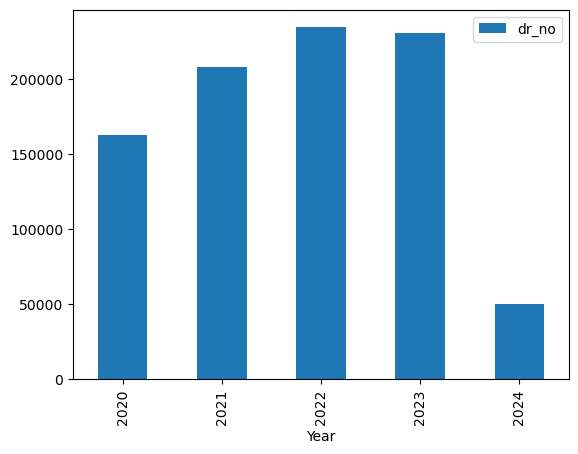

In [143]:
y_value.plot(kind="bar",x="Year",y="dr_no")

In [144]:
response_df_formatted.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4', 'quarter', 'Year'],
      dtype='object')

In [145]:
clean = response_df_formatted.dropna(subset=["date_occ", "area_name", "lat", "lon"])
clean.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020


In [146]:
clean_2021 = clean.loc[(clean["date_occ"] >= "2020-03-01") & (clean["date_occ"] < "2021-03-01")]
clean_2122 = clean.loc[(clean["date_occ"] >= "2021-03-01") & (clean["date_occ"] < "2022-03-01")]
clean_2223 = clean.loc[(clean["date_occ"] >= "2022-03-01") & (clean["date_occ"] < "2023-03-01")]
clean_2324 = clean.loc[(clean["date_occ"] >= "2023-03-01") & (clean["date_occ"] < "2024-03-01")]
clean_2021["Year"] = "2020"
clean_2122["Year"] = "2021"
clean_2223["Year"] = "2022"
clean_2324["Year"] = "2023"

/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_92082/4140397869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021["Year"] = "2020"
/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_92082/4140397869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122["Year"] = "2021"
/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_92082/4140397869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [147]:
combodata = pd.concat([clean_2021, clean_2122, clean_2223, clean_2324], ignore_index=False, axis=0)


In [148]:
response_df_formatted = combodata
response_df_formatted['date_occ'] = pd.to_datetime(response_df_formatted['date_occ'])
response_df_formatted['date_occ']



0        2020-03-01
2        2020-11-04
3        2020-03-10
4        2020-08-17
5        2020-12-01
            ...    
925715   2024-02-11
925716   2024-01-13
925717   2024-02-17
925718   2024-01-16
925719   2024-01-15
Name: date_occ, Length: 872869, dtype: datetime64[ns]

In [149]:
# VAIBHAV Work Start here

crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()

In [150]:
crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()


,crm_cd_desc,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
count,872869,872869,872858,63392,2138,61,872869,872869
unique,139,139,141,124,35,6,4,21
top,VEHICLE - STOLEN,510,510,998,998,998,2022,Central
freq,94841,94841,94823,50730,1888,53,236963,59529


In [151]:
crime_code_df_area=crime_code_df.groupby(["area_name"]).count()
crime_code_df_year=crime_code_df.groupby(["Year"]).count()
crime_code_df_desc=crime_code_df.groupby(["crm_cd_desc"]).size()
crime_code_df_desc_1=crime_code_df.groupby(["crm_cd_desc"]).count()
crime_code_df_cd=crime_code_df.groupby(["crm_cd","crm_cd_desc"]).count()

In [152]:
response_df_formatted["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                94841
BATTERY - SIMPLE ASSAULT                        68874
THEFT OF IDENTITY                               54729
BURGLARY                                        53819
BURGLARY FROM VEHICLE                           53409
                                                ...  
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)        5
FIREARMS RESTRAINING ORDER (FIREARMS RO)            4
FAILURE TO DISPERSE                                 3
DISHONEST EMPLOYEE ATTEMPTED THEFT                  2
TRAIN WRECKING                                      1
Name: count, Length: 139, dtype: int64

<Axes: xlabel='crm_cd_desc'>

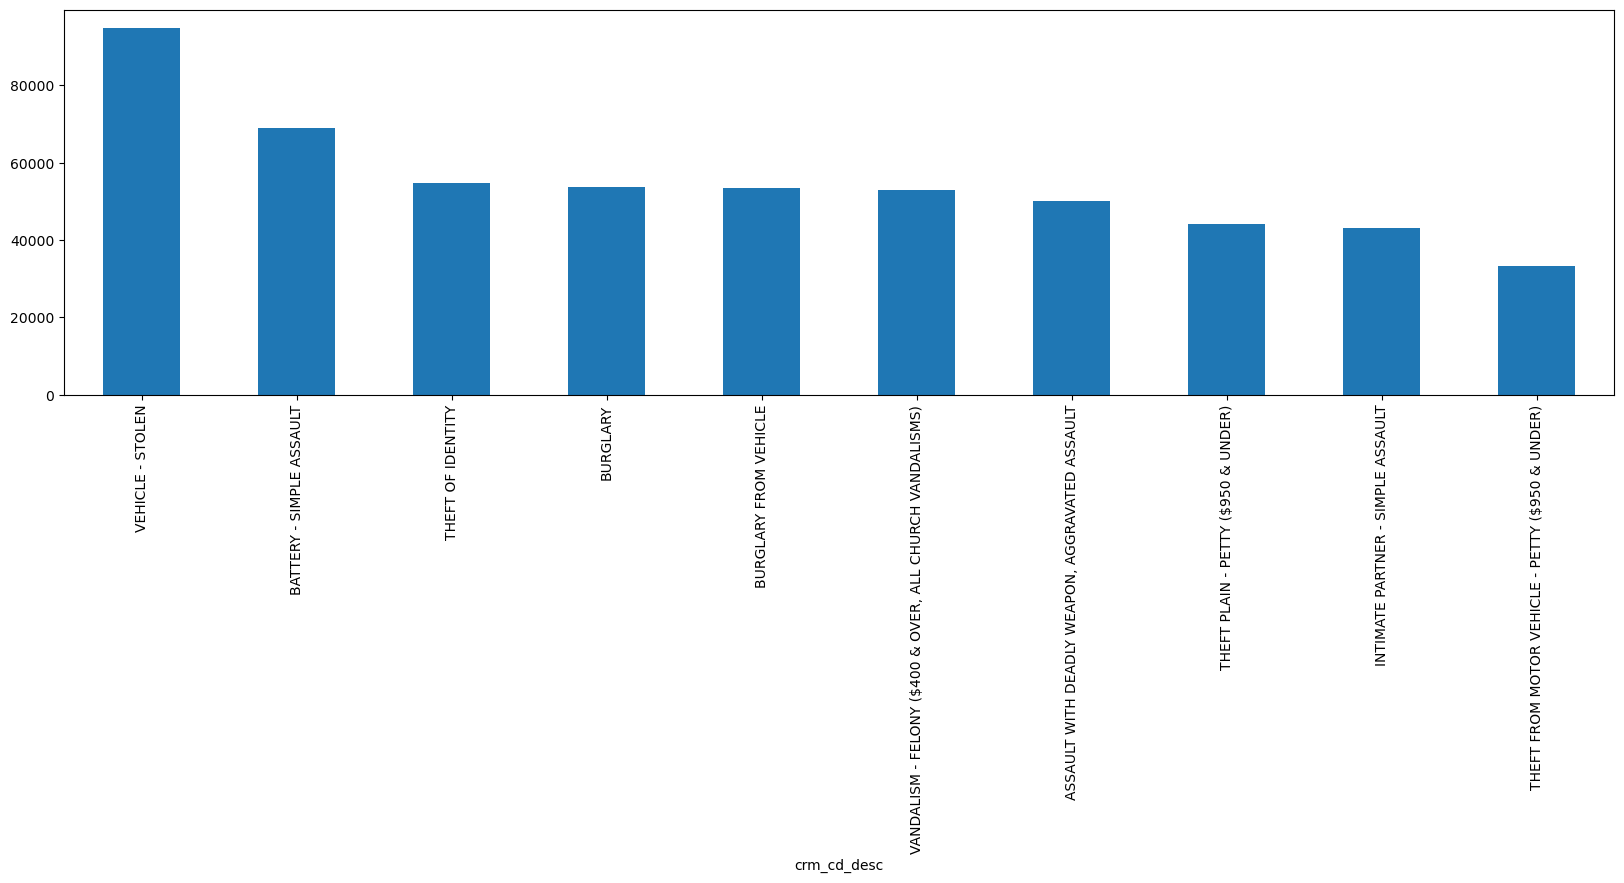

In [153]:
#top 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).head(10).plot(kind="bar",figsize=(20,5))

<Axes: xlabel='crm_cd_desc'>

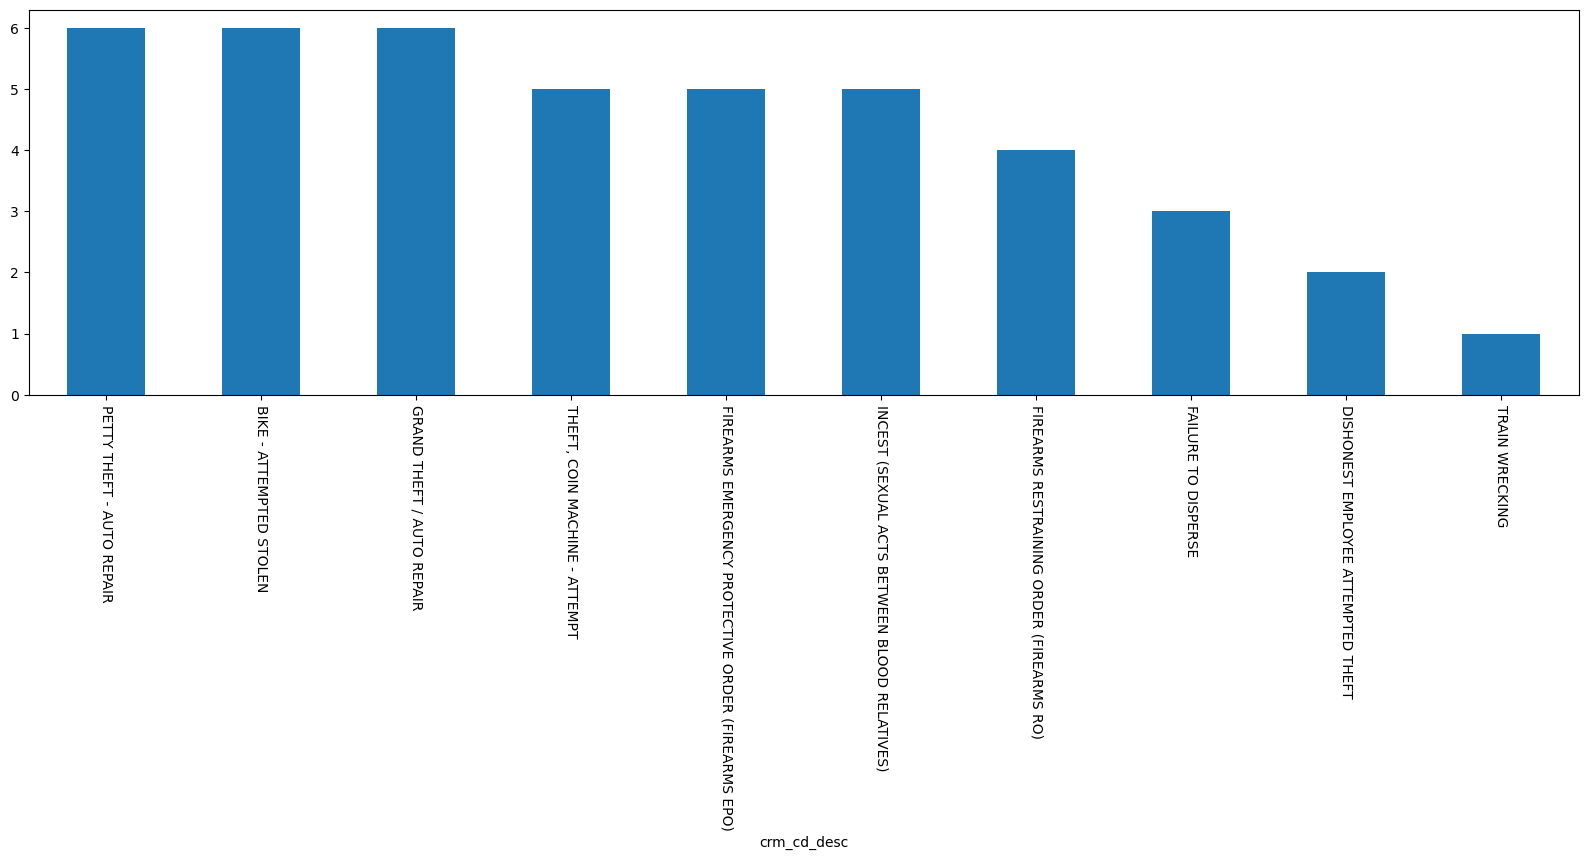

In [154]:
#Least 10 crimes committed

crime_code_df_desc.sort_values(ascending=False).tail(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='area_name'>

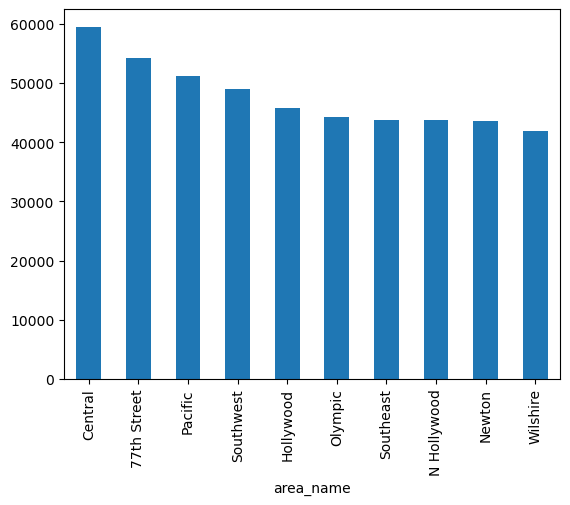

In [155]:
# crime_code_df_area.plot(kind="bar",y="crm_cd_1")
crime_code_df_area["crm_cd_desc"].sort_values(ascending=False).head(10).plot(kind="bar")


In [156]:
crime_code_df_desc_1


,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
crm_cd_desc,,,,,,,
ARSON,2271,2271,366,4,0,2271,2271
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1032,1032,219,0,0,1032,1032
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",50134,50134,11821,238,5,50134,50134
ATTEMPTED ROBBERY,4477,4477,759,30,0,4477,4477
BATTERY - SIMPLE ASSAULT,68874,68874,1782,29,5,68874,68874
...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",2018,2018,32,0,0,2018,2018
VIOLATION OF COURT ORDER,5815,5815,118,0,0,5815,5815
VIOLATION OF RESTRAINING ORDER,10839,10839,314,0,0,10839,10839


In [157]:
crime_code_df_desc

crm_cd_desc
ARSON                                                        2271
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1032
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              50134
ATTEMPTED ROBBERY                                            4477
BATTERY - SIMPLE ASSAULT                                    68874
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2018
VIOLATION OF COURT ORDER                                     5815
VIOLATION OF RESTRAINING ORDER                              10839
VIOLATION OF TEMPORARY RESTRAINING ORDER                      860
WEAPONS POSSESSION/BOMBING                                     37
Length: 139, dtype: int64

In [158]:
response_df_formatted["weapon_desc"].value_counts()


weapon_desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    160515
UNKNOWN WEAPON/OTHER WEAPON                        32746
VERBAL THREAT                                      22036
HAND GUN                                           18897
SEMI-AUTOMATIC PISTOL                               6815
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [159]:
crime_code_df_desc.sort_values(ascending=False).head(50)

crm_cd_desc
VEHICLE - STOLEN                                            94841
BATTERY - SIMPLE ASSAULT                                    68874
THEFT OF IDENTITY                                           54729
BURGLARY                                                    53819
BURGLARY FROM VEHICLE                                       53409
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     53052
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              50134
THEFT PLAIN - PETTY ($950 & UNDER)                          44088
INTIMATE PARTNER - SIMPLE ASSAULT                           43112
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             33206
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         31636
ROBBERY                                                     29783
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    29198
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    22426
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    2235

In [ ]:
# threshold=Top_Crimes_LosAngeles.values.sum()*.06
# Top_Crimes_LosAngeles_Filtered=Top_Crimes_LosAngeles[Top_Crimes_LosAngeles[]]

# Top_Crimes_LosAngeles=Top_Crimes_LosAngeles.columns=['Column1', 'Column2']
Top_Crimes_LosAngeles.index

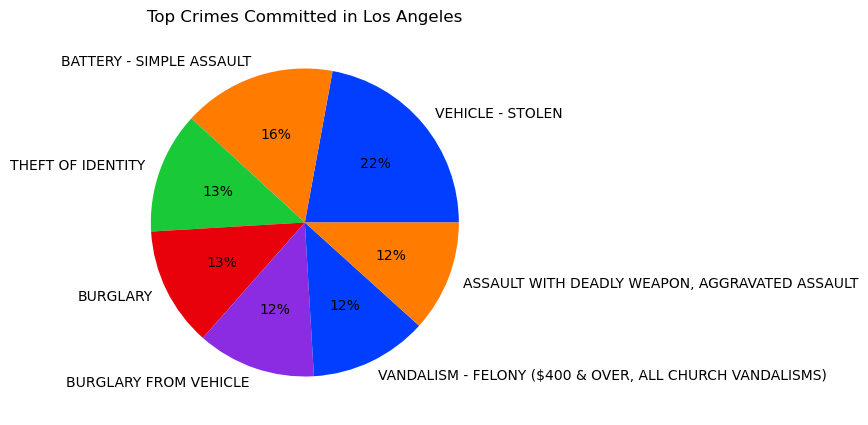

In [160]:
# Top 7 Crimes Committed in Los Angeles

Top_Crimes_LosAngeles=response_df_formatted["crm_cd_desc"].value_counts().sort_values(ascending=False).head(7)
# TOP 7 Crimes Committed represent 50% of all the total crimes committed in los angeles in the given period

#define data
plt.figure(figsize=(10,5))
data=Top_Crimes_LosAngeles.values
labels=Top_Crimes_LosAngeles.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Crimes Committed in Los Angeles")
plt.show()


In [162]:
pd.set_option('display.max_columns', None)
response_df_formatted.head(5)


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020


In [ ]:
threshold = 800
other_count = premis_count[premis_count < threshold].sum()
premis_count = premis_count[premis_count >= threshold]
premis_count_series = pd.Series(other_count, index=['other'])
premis_count = pd.concat([premis_count, premis_count_series])
premis_count